# U.S. Medical Insurance Costs

##### The goal with this project will be to analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [292]:
# importing librarys
import csv
import pandas as pd
from matplotlib import pyplot as plt

- The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:

In [293]:
#Create empty lists for the various attributes in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

<strong>insurance.csv</strong> contains the following columns:

- Patient Age
- Patient Sex
- Patient BMI
- Patient Number of Children
- Patient Smoking Status
- Patient U.S Geopraphical Region
- Patient Yearly Medical Insurance Cost <br>

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from insurance.csv.

In [294]:
# helper function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

#Reading the file and saving the contents into a variable for
#easier manipulation.
insurance_csv_list = []
with open('insurance.csv', newline='') as insurance_csv_file:
    insurance_csv_dict = csv.DictReader(insurance_csv_file)
    for row in insurance_csv_dict:
        insurance_csv_list.append(row)

The helper function above was created to make loading data into the lists as efficient as possible. Without this function, one would have to open insurance.csv and rewrite the for loop seven times; however, with this function, one can simply call load_list_data() each time as shown below.

In [295]:
# look at the data in insurance_csv_dict
load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

<i> Now that all the data from insurance.csv neatly organized into labeled lists, the analysis can be started. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:</i>

- find average age of the patients
- return the number of males vs. females counted in the dataset
- find geographical location of the patients
- return the average yearly medical charges of the patients
- creating a dictionary that contains all patient information

In [296]:
# function that calculates the average ages of the patients in insurance.csv
def analyze_ages(patients_ages):
    # initialize total age at zero
    total_age = 0
    # iterate through all ages in the ages list
    for age in patients_ages:
        # sum of the total age
        total_age += int(age)
    # return total age divided by the length of the patient list
    return ("Average Patient Age: " + str(round(total_age/len(patients_ages), 2)) + " years")


analyze_ages(ages)

'Average Patient Age: 39.21 years'

In [297]:
# function to find average yearly medical charges for patients in insurance.csv
def average_charges(charges):
    # initialize total_charges variable
    total_charges = 0
    # iterate through charges in patients charges list
    # add each charge to total_charge
    for charge in charges:
        total_charges += float(charge)
    # return the average charges rounded to the hundredths place
    return ("Average Yearly Medical Insurance Charges: " +  
            str(round(total_charges/len(charges), 2)) + " dollars.")

average_charges(insurance_charges)

'Average Yearly Medical Insurance Charges: 13270.42 dollars.'

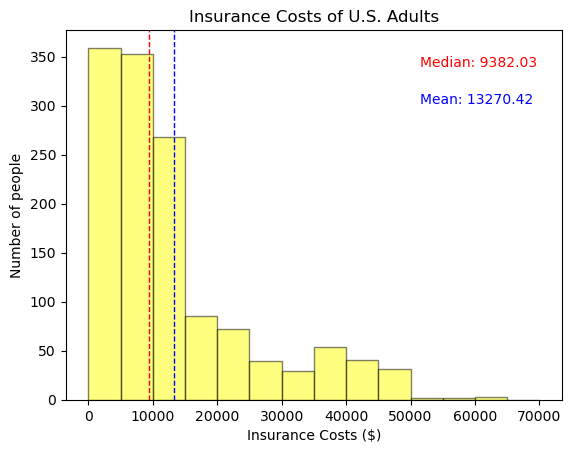

<Figure size 640x480 with 0 Axes>

In [298]:
# function that calculates the average cost of the patients in insurance.csv
# Reading in the data from 'insurances.csv'
insurances = pd.read_csv('insurance.csv')

# Plotting a histogram with labels and a title
plt.hist(insurances.charges, range=(0, 70000), bins=14, edgecolor='black', alpha=0.5, color='yellow')
plt.title('Insurance Costs of U.S. Adults')
plt.xlabel('Insurance Costs ($)')
plt.ylabel('Number of people')

# Plotting the median and mean line on the histogram
plt.axvline(insurances.charges.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(insurances.charges.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.7, max_ylim * 0.8, f'Mean: {round(insurances.charges.mean(), 2)}', color='b')
plt.text(max_xlim*0.7, max_ylim * 0.9, f'Median: {round(insurances.charges.median(),2)}', color='r')

plt.show()
plt.clf()


Count for female:  1324
Count for male:  1352


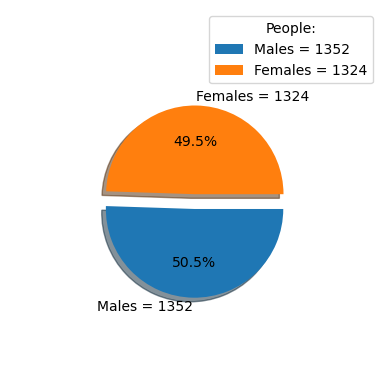

In [299]:
import matplotlib.pyplot as plt
import numpy as np

# function that calculates the number of males and females in insurance.csv
def analyze_sexes(sexes):
    # initialize number of males and females to zero
    females = 0
    males = 0
    # iterate through each sex in the sexes list
    for sex in sexes:
        # if female add to female variable
        if sex == 'female':
            females += 1
        # if male add to male variable
        elif sex == 'male':
            males += 1
    # print out the number of each
    print("Count for female: ", females)
    print("Count for male: ", males)
    
    
    y = np.array([males, females])
    myexplode = [0.1, 0]
    mylabels = [f"Males = {males}", f"Females = {females}"]
    

    plt.pie(y, shadow = True, explode = myexplode, autopct = '%1.1f%%', labels = mylabels, counterclock = False,radius = 0.6)
    plt.legend(title = "People:")
    plt.show() 
    
analyze_sexes(load_list_data(sexes, 'insurance.csv', 'sex'))




In [300]:
# function to find each unique region patients are from
def unique_regions(regions):
    # initialize empty list
    unique_regions = []
    # iterate through each region in regions list
    for region in regions:
        # if the region is not already in the unique regions list
        # then add it to the unique regions list
        if region not in unique_regions: 
            unique_regions.append(region)
    # return unique regions list
    return unique_regions

unique_regions(regions)

['southwest', 'southeast', 'northwest', 'northeast']

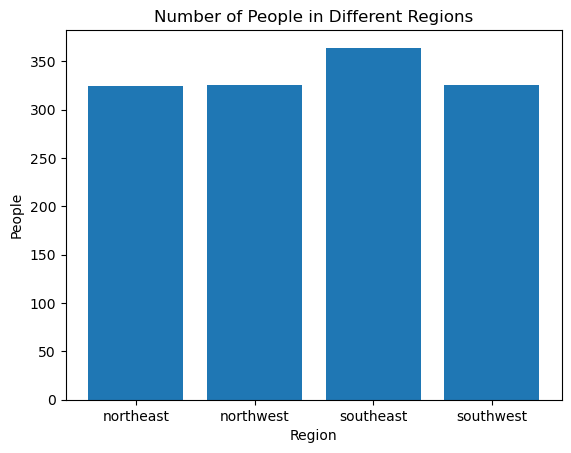

In [301]:
def individual_regions(regions):
    insurance_csv_list = []
    northeast, northwest, southeast, southwest = 0, 0, 0, 0
    for line in regions:
        if line == "northeast":
            northeast += 1
        elif line == "northwest":
            northwest += 1
        elif line == "southeast":
            southeast += 1
        elif line == "southwest":
            southwest += 1
    regions = ['northeast', 'northwest', 'southeast', 'southwest']
    region_totals = [northeast, northwest, southeast, southwest]
    plt.bar(regions, region_totals)
    plt.xlabel('Region')
    plt.ylabel('People')
    plt.title('Number of People in Different Regions')
    plt.show()
    
individual_regions(regions)

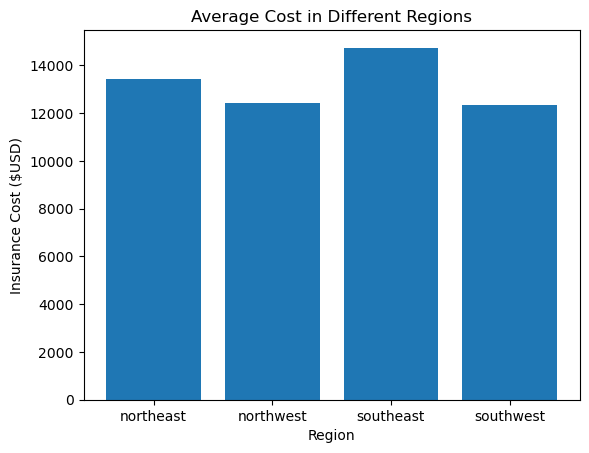

In [302]:
#Finding the average cost per region.

def average_cost_per_region(insurance_csv_list):
    
    northeast_count, northwest_count, southeast_count, southwest_count = 0, 0, 0, 0
    total_cost_NE, total_cost_NW, total_cost_SE, total_cost_SW = 0, 0, 0, 0
    for line in insurance_csv_list:
        if line["region"] == "northeast":
            northeast_count += 1
            total_cost_NE += round(float(line["charges"]), 2)
        elif line["region"] == "northwest":
            northwest_count += 1
            total_cost_NW += round(float(line["charges"]), 2)
        elif line["region"] == "southeast":
            southeast_count += 1
            total_cost_SE += round(float(line["charges"]), 2)
        elif line["region"] == "southwest":
            southwest_count += 1
            total_cost_SW += round(float(line["charges"]), 2)
    regions = ['northeast', 'northwest', 'southeast', 'southwest']
    region_average_costs = [total_cost_NE/northeast_count, total_cost_NW/northwest_count, total_cost_SE/southeast_count, total_cost_SW/southwest_count]
    plt.bar(regions, region_average_costs)
    plt.xlabel('Region')
    plt.ylabel('Insurance Cost ($USD)')
    plt.title('Average Cost in Different Regions')
    plt.show()

average_cost_per_region(insurance_csv_list)

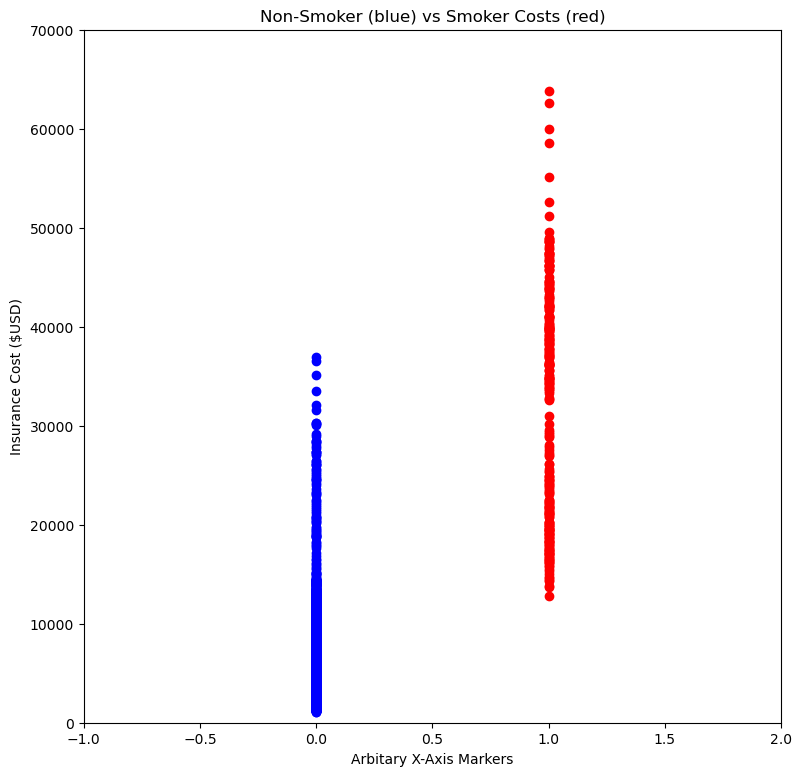

In [303]:
#Finding the relation between smoking and costs. 
def non_smokers_vs_smokers(insurance_csv_list):
    non_smoker_costs = [round(float(line["charges"]), 2) for line in insurance_csv_list if line["smoker"] == "no"]
    smoker_costs = [round(float(line["charges"]), 2) for line in insurance_csv_list if line["smoker"] == "yes"]

    plt.figure(figsize=(9, 9))
    plt.plot([0], [non_smoker_costs], 'bo')
    plt.plot([1], [smoker_costs], 'ro')
    plt.axis([-1, 2, 0, 70000])
    plt.xlabel('Arbitary X-Axis Markers')
    plt.ylabel('Insurance Cost ($USD)')
    plt.title("Non-Smoker (blue) vs Smoker Costs (red)")
    plt.show()

non_smokers_vs_smokers(insurance_csv_list)

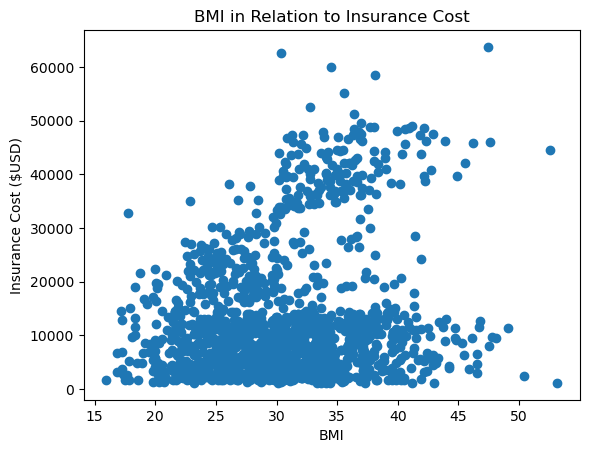

In [304]:
#Plotting BMI in relation to cost. 
def bmi_relation_to_cost(insurance_csv_list):
    all_bmi = [float(line["bmi"]) for line in insurance_csv_list]
    all_charges = [round(float(line["charges"]), 2) for line in insurance_csv_list]
    plt.scatter(all_bmi, all_charges)
    plt.xlabel('BMI')
    plt.ylabel('Insurance Cost ($USD)')
    plt.title("BMI in Relation to Insurance Cost")
    plt.show()
    
bmi_relation_to_cost(insurance_csv_list)

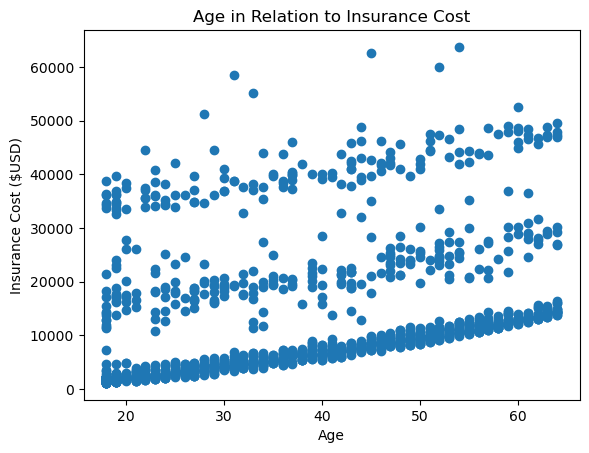

In [305]:
#Plotting Age in relation to cost. 
def age_relation_to_cost(insurance_csv_list):
    all_ages = [int(line["age"]) for line in insurance_csv_list]
    all_charges = [round(float(line["charges"]), 2) for line in insurance_csv_list]
    plt.scatter(all_ages, all_charges)
    plt.xlabel('Age')
    plt.ylabel('Insurance Cost ($USD)')
    plt.title("Age in Relation to Insurance Cost")
    plt.show()
    
age_relation_to_cost(insurance_csv_list)

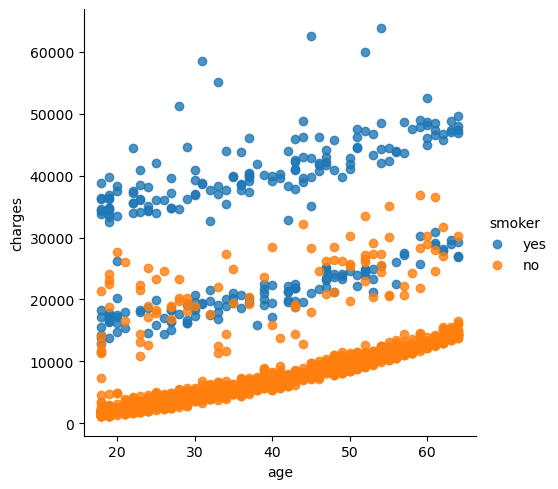

In [306]:
import seaborn as sns

sns.lmplot(x='age', y='charges', hue='smoker', data=insurances, fit_reg=False)
plt.show()

<strong>From this graph, we can see that across all age groups, smokers pay oustandingly higher insurance charges than do non-smokers.</strong>

<br/>
<br/>
<br/>


  variables  corr_coeff
0       age    0.299008
1       sex   -0.057292
2       bmi    0.198341
3     child    0.067998
4    smoker    0.787251
5    region    0.006208
The table shows that the 'smoker' variable has the strongest correlation with 'charges', and 'region' has the weakest (or almost no) correlation with 'charges'. This contradicts my initial hypothesis that "bmi" would be the largest contributing factor to the insurance charges ("bmi" in fact had a low correlation coefficient value of less than 0.2).
Let us dig deeper into the relationship between 'smoker' and 'charges'. The easiest way to find if there exists a linear relationship between these two variables is using the scatter plot to visually represent the relationship.



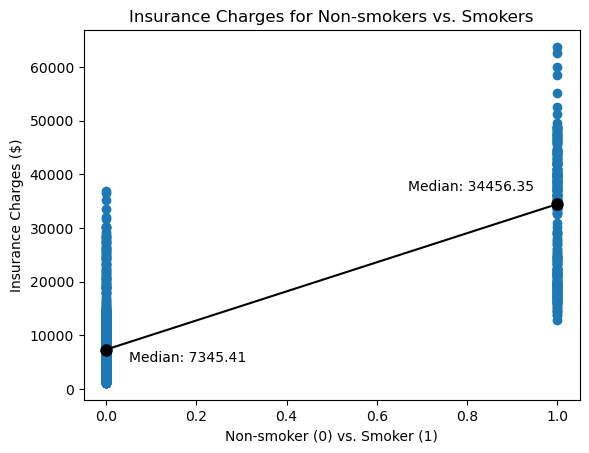

<Figure size 640x480 with 0 Axes>

In [307]:
# Function that converts each 'region' string value into an integer value
def region_index(x):
	if x == 'southwest':
		return 1
	elif x == 'southeast':
		return 2
	elif x == 'northwest':
		return 3
	else:
		return 4

# Converting the string values into integer values for easier computation
insurances['sex'] = insurances.sex.apply(lambda x: 1 if x =="male" else 2)
insurances['smoker'] = insurances.smoker.apply(lambda x: 1 if x =='yes' else 0)
insurances['region'] = insurances.region.apply(lambda x: region_index(x))

#Calculating the correlation coefficient of each variable with the insurance charges
age_charges = insurances['age'].corr(insurances['charges'])
sex_charges = insurances['sex'].corr(insurances['charges'])
bmi_charges = insurances['bmi'].corr(insurances['charges'])
child_charges = insurances['children'].corr(insurances['charges'])
smoker_charges = insurances['smoker'].corr(insurances['charges'])
region_charges = insurances['region'].corr(insurances['charges'])


# Creating a table of variables against the correlation coefficients to easily compare the values
charges_corr_df = pd.DataFrame({'variables': ['age', 'sex', 'bmi', 'child', 'smoker', 'region'], 'corr_coeff': [age_charges, sex_charges, bmi_charges, child_charges, smoker_charges, region_charges]})
print(charges_corr_df)

print("""The table shows that the 'smoker' variable has the strongest correlation with 'charges', and 'region' has the weakest (or almost no) correlation with 'charges'. This contradicts my initial hypothesis that "bmi" would be the largest contributing factor to the insurance charges ("bmi" in fact had a low correlation coefficient value of less than 0.2).
Let us dig deeper into the relationship between 'smoker' and 'charges'. The easiest way to find if there exists a linear relationship between these two variables is using the scatter plot to visually represent the relationship.
""")


# Grouping by 'smoker' column
charges_smoker = insurances.groupby('smoker').charges.median().reset_index()
smoker_median = charges_smoker.iloc[1,1]
non_smoker_median = charges_smoker.iloc[0,1]



# Plotting a scatterplot of 'smoker' vs. 'charges' with labels and a title
plt.scatter(insurances['smoker'], insurances['charges'])
plt.xlabel('Non-smoker (0) vs. Smoker (1)')
plt.ylabel('Insurance Charges ($)')
plt.title('Insurance Charges for Non-smokers vs. Smokers')
plt.plot([0,1], [non_smoker_median, smoker_median], color='k')
plt.plot(0, non_smoker_median, marker='o', color='k',markersize=8)
plt.plot(1, smoker_median, marker='o', color='k',markersize=8)
plt.text(0.05, 5000, f'Median: {round(non_smoker_median, 2)}', color='k')
plt.text(0.67, 37000, f'Median: {round(smoker_median, 2)}', color='k')
plt.show()
plt.clf()

The median insurance charges of the non-smokers is approximately 7345.41, whereas the median insurance charges for smokers is approximately 34456.35, 469.70% higher than that of non-smokers.

Although we can't directly conclude that the higher insurance charges are due to one's smoking habits, it is safe to speculate that smokers tend to pay higher insurance charges on average compared to non-smokers .